<div class='bar_title'></div>

*Practical Data Science*

# Creating your own Dataset

Matthias Griebel<br>
Chair of Information Systems and Management

Winter Semester 19/20

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-your-own-dataset-from-Google-Images" data-toc-modified-id="Creating-your-own-dataset-from-Google-Images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating your own dataset from Google Images</a></span><ul class="toc-item"><li><span><a href="#Search-and-scroll" data-toc-modified-id="Search-and-scroll-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Search and scroll</a></span></li><li><span><a href="#Download-into-file" data-toc-modified-id="Download-into-file-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Download into file</a></span></li><li><span><a href="#Upload-urls-file-into-your-server" data-toc-modified-id="Upload-urls-file-into-your-server-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Upload urls file into your server</a></span></li><li><span><a href="#Create-folders-and-download-images" data-toc-modified-id="Create-folders-and-download-images-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Create folders and download images</a></span></li><li><span><a href="#View-data" data-toc-modified-id="View-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>View data</a></span></li></ul></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train model</a></span></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interpretation</a></span></li><li><span><a href="#Cleaning-Up" data-toc-modified-id="Cleaning-Up-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning Up</a></span></li><li><span><a href="#Putting-your-model-in-production" data-toc-modified-id="Putting-your-model-in-production-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Putting your model in production</a></span><ul class="toc-item"><li><span><a href="#Building-your-own-web-app" data-toc-modified-id="Building-your-own-web-app-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Building your own web app</a></span></li></ul></li><li><span><a href="#Things-that-can-go-wrong" data-toc-modified-id="Things-that-can-go-wrong-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Things that can go wrong</a></span><ul class="toc-item"><li><span><a href="#Learning-rate-(LR)-too-high" data-toc-modified-id="Learning-rate-(LR)-too-high-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Learning rate (LR) too high</a></span></li><li><span><a href="#Learning-rate-(LR)-too-low" data-toc-modified-id="Learning-rate-(LR)-too-low-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Learning rate (LR) too low</a></span></li><li><span><a href="#Too-few-epochs" data-toc-modified-id="Too-few-epochs-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Too few epochs</a></span></li><li><span><a href="#Too-many-epochs" data-toc-modified-id="Too-many-epochs-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Too many epochs</a></span></li></ul></li></ul></div>

__Credits__

Materials from 
- [Francisco Ingham, Jeremy Howard](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb) and [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)

## Creating your own dataset from Google Images

In the first part of the lecture we will see how to easily create an image dataset through Google Images.

In [1]:
from fastai.vision import *

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. 
- All the images you scrolled past are now available to download. 
- To get more, click on the button, and continue scrolling. 
- The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In __Google Chrome__ press 
- <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux 
- <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, 
and a small window the javascript 'Console' will appear. 

In __Firefox__ press 
- <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or 
- <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. 
That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. 

Then you can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Save the resulting .csv file.

### Upload urls file into your server

Upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files (you can ignore the folder names in the example image below).

![uploaded file](https://github.com/fastai/course-v3/raw/master/nbs/dl1/images/download_images/upload.png)

### Create folders and download images

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [11]:
folder = 'apple'
file = 'urls_apple.csv'

In [14]:
folder = 'pear'
file = 'urls_pear.csv'

In [17]:
folder = 'quince'
file = 'urls_quince.csv'

You will need to run this cell once per each category.

In [18]:
path = Path('data/fruits')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [19]:
path.ls()

[PosixPath('data/fruits/urls_apple.csv'),
 PosixPath('data/fruits/quince'),
 PosixPath('data/fruits/pear'),
 PosixPath('data/fruits/urls_quince.csv'),
 PosixPath('data/fruits/urls_pear.csv'),
 PosixPath('data/fruits/apple')]

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [20]:
download_images(path/file, dest, max_pics=200)

In [ ]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

__Verify Images__

We can easily remove any images that can't be opened. The function `verify_image` will check all of the images in a `path` and will tell you if there's a problem. If you say `delete=True`, it will actually delete it for you. 

In [40]:
classes = ['apple', 'pear', 'quince']

In [41]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

How would you do this using list comprehension?

### View data

The easiest way to view the data is using a DataBunch.  

We always set a __random seed__ to something fixed beforehand. This means that every time we run this code, we'll get the same validation set. 

__Randomness__ is a really important part of finding out your is solution stable and it is going to work each time you run it. But what is important is that we always have the same validation set for evaluation or hyperparameter tuning.

In [42]:
np.random.seed(42) #
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=224).normalize(imagenet_stats)

In [37]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [43]:
data.classes

['apple', 'pear', 'quince']

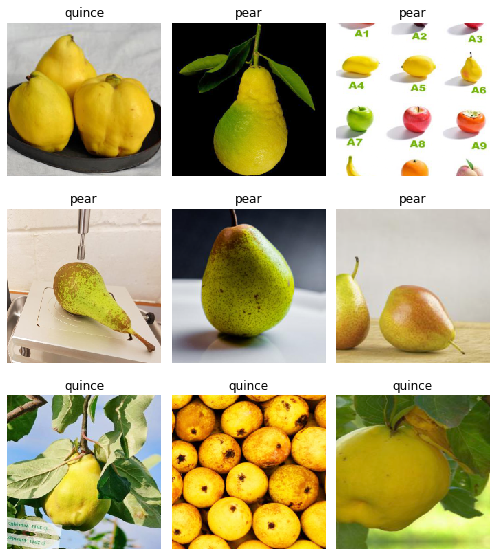

In [44]:
data.show_batch(rows=3, figsize=(7,8))

In [45]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple', 'pear', 'quince'], 3, 448, 112)

## Train model

At that point, we can go ahead and create our convolutional neural network using that data. 
We will use a resnet34 again and print out the error rate each time.

In [52]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

We use the LR Finder to pick a good learning rate.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-03
Min loss divided by 10: 8.32E-03


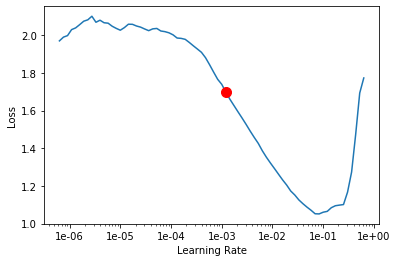

In [53]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

Then run `fit_one_cycle` 4 times and see how we go.

In [54]:
learn.fit_one_cycle(4, max_lr=1.2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.748310,0.925055,0.348214,00:02
1,1.230756,0.641271,0.196429,00:02
2,0.903709,0.554170,0.142857,00:02
3,0.732542,0.521024,0.142857,00:02


If things are looking good, we should always save our model.

In [56]:
learn.save('stage-1')

As per usual, we unfreeze the rest of our model...

In [57]:
learn.unfreeze()

... and use the LR Finder to pick a good learning rate. Most of these parameters don't actually matter that much in detail. If we just copy the numbers that I use each time, the vast majority of the time, it'll just work fine. 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


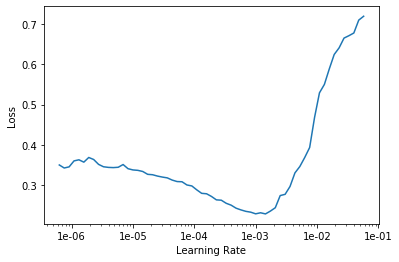

In [58]:
learn.lr_find()
learn.recorder.plot()

If the plot is not showing try to give a start and end learning rate

`learn.lr_find(start_lr=1e-5, end_lr=1e-1`

We run fit_one_cycle again see how we go.

In [60]:
learn.fit_one_cycle(5, max_lr=slice(1.2e-5,1.2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.164075,0.443649,0.107143,00:02
1,0.163523,0.455342,0.116071,00:02
2,0.141159,0.454075,0.107143,00:03
3,0.119823,0.453939,0.098214,00:02
4,0.103610,0.451842,0.107143,00:02


So we've downloaded some images from Google image search, created a classifier, and we've got about 10% error rate. Let's save it.

In [68]:
learn.save('stage-2')

## Interpretation

We can use the `ClassificationInterpretation` class to have a look at what's going on.

In [62]:
learn.load('stage-2');

In [63]:
interp = ClassificationInterpretation.from_learner(learn)

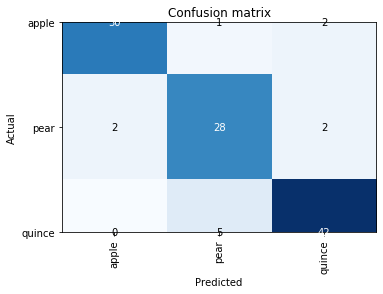

In [67]:
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [75]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split.

In [71]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [72]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [76]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [77]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [78]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())


If the code above does not show any GUI (contains images and buttons) rendered by widgets but only text output, that may caused by the configuration problem of ipywidgets. Try the solution in this [link](https://github.com/fastai/fastai/issues/1539#issuecomment-505999861) to solve it.


Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

__Removing Duplicates__

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [281]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [282]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [283]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

__CPU for inference__

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [284]:
defaults.device = torch.device('cpu')

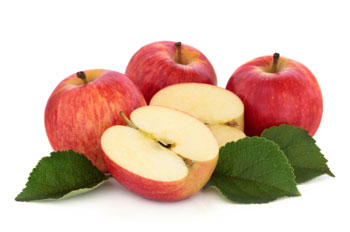

In [287]:
img = open_image(path/'apple'/'00000011.jpg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [288]:
learn = load_learner(path)

In [289]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category apple

### Building your own web app

To build you own web app, you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit, [this](https://github.com/encode/starlette-example) is an Example App Repo))

Even if you've never created a web application before, there's a lot of nice little tutorials online and kind of starter code, if in doubt, why don't you try Starlette. 
- There's a free hosting that you can use, there's one called [PythonAnywhere](https://www.pythonanywhere.com/), for example. 
- [Zeit Now](https://zeit.co/home) let's you package your app up as a docker it'll serve it up for you.

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [79]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [80]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,19.250519,1588771072.000000,0.714286,00:02


### Learning rate (LR) too low

In [81]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Epoch  train_loss  valid_loss error_rate time
0	 1.748310	0.925055	0.348214	00:02
1	 1.230756	0.641271	0.196429	00:02
2	 0.903709	0.554170	0.142857	00:02
3	 0.732542	0.521024	0.142857	00:02
```

In [82]:
learn.fit_one_cycle(5, max_lr=1e-10)

epoch,train_loss,valid_loss,error_rate,time
0,1.863050,1.355506,0.535714,00:02
1,1.876521,1.353790,0.571429,00:02
2,1.883509,1.370380,0.580357,00:02
3,1.866692,1.376363,0.598214,00:02
4,1.872635,1.385171,0.598214,00:02


The `learn.recorder` is an object which is going to keep track of lots of things happening while you train. You can call `plot_losses` to plot out the validation and training loss. 

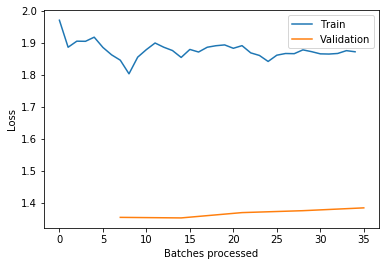

In [83]:
learn.recorder.plot_losses()

And you can just see them gradually going down so slow. If you see that happening, then you have a learning rate which is too small. So bump it by 10 or bump it up by 100 and try again. 

The other thing you see if your learning rate is too small is that your training loss will be higher than your validation loss. You never want a model where your training loss is higher than your validation loss. It always means you haven't fitted enough which means either your learning rate is too low or your number of epochs is too low. So if you have a model like that, train it some more or train it with a higher learning rate.

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [237]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [238]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.336813,38.757069,0.677966,00:01


### Too many epochs

__Overfitting__

You will see a lot of people tell that if your training loss is lower than your validation loss, then you are overfitting. __This is not true.__ Any model that is trained correctly will always have a lower training loss than validation loss.

That is a sign you have done something right. The sign that you're overfitting is that your error starts getting worse, because that's what you care about. You want your model to have a low error. So as long as you're training and your model error is improving, you're not overfitting.

We turn off all the data augmentation, dropout, and weight decay. We try to make it overfit as much as we can.

- Small learning rate
- Training for a really long time 

And maybe we started to get it to overfit. Maybe.

In [85]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [86]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [87]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.183068,1.693465,0.678571,00:04
1,1.945310,1.681971,0.688492,00:02
2,1.891546,1.646319,0.694444,00:02
3,1.869615,1.609632,0.692460,00:02
4,1.786337,1.554914,0.686508,00:02
5,1.695101,1.483978,0.684524,00:02
6,1.574420,1.409277,0.646825,00:02
7,1.473906,1.325647,0.611111,00:02
8,1.356634,1.241973,0.581349,00:02
9,1.236001,1.172557,0.533730,00:02
